In [1]:
### Reference: https://www.youtube.com/watch?v=QIUxPv5PJOY
#https://github.com/rudrajikadra/Stock-Market-Prediction-and-Forecasting-Using-Stacked-LSTM

In [2]:
#import the libraries
!pip install pandas_datareader
!pip install keras
!pip install tensorflow
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import math

In [3]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [4]:
#pip list #check the list of software within pip

In [5]:
#get the stock quote
df = web.DataReader('AAPL', data_source='yahoo',start='2012-01-02', end='2021-12-31')

In [6]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575916
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643497
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783869
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917510
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897018
...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749


In [7]:
df.shape 

(2517, 6)

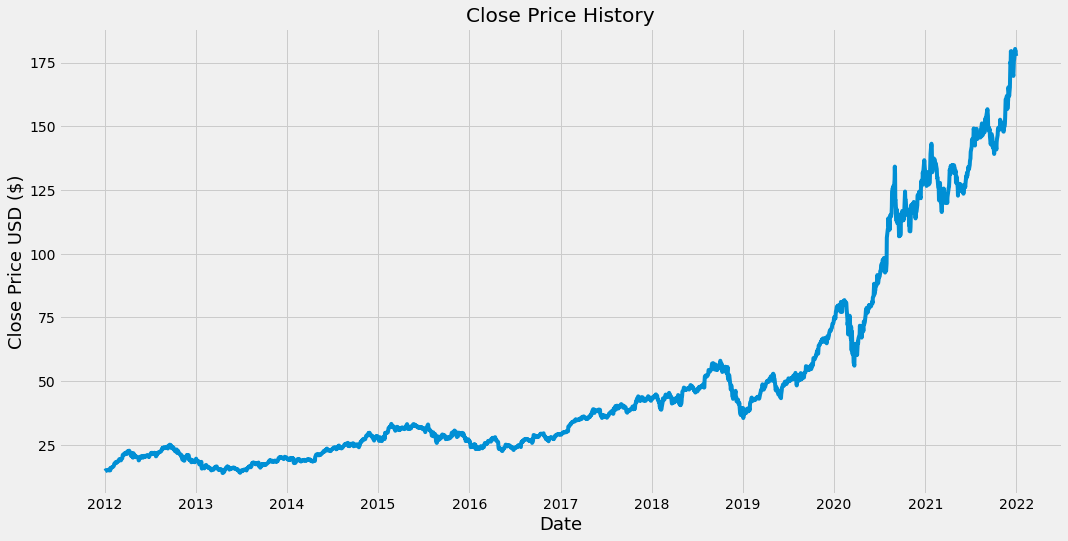

In [8]:
#visulize the closing price history
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize =18)
plt.show()

In [9]:
#new dataframe with only the 'close column'
df_close = df.filter(['Close'])

#convert dataframe to numpy
dataset = df_close.values

In [10]:
training_data_len = math.ceil(len(dataset)* .8) #80% of the data to be training data
training_data_len

2014

In [11]:
#scale data before using neutron network
scaler = MinMaxScaler (feature_range =(0,1))
scaled_data = scaler.fit_transform(dataset)

In [12]:
scaled_data

array([[0.00444329],
       [0.00491767],
       [0.00590292],
       ...,
       [0.99429028],
       [0.98719814],
       [0.98341175]])

In [13]:
#create the training data set
train_data = scaled_data[0:training_data_len, :]

#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(100,len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i, 0])
    if i <=101:
        print(x_train)
        print(y_train)
        print()

[array([0.00444329, 0.00491767, 0.00590292, 0.00684095, 0.00669713,
       0.00702125, 0.00687314, 0.00662415, 0.006285  , 0.00733465,
       0.00828126, 0.00798934, 0.00639018, 0.00791635, 0.00641379,
       0.0120484 , 0.01161266, 0.01218148, 0.01341144, 0.01415627,
       0.01409403, 0.01386435, 0.01484316, 0.01576401, 0.01680723,
       0.01849225, 0.02203185, 0.02208551, 0.02405602, 0.02552852,
       0.02299779, 0.0239723 , 0.02395298, 0.0266855 , 0.02629698,
       0.02701606, 0.02830826, 0.02902735, 0.03109874, 0.03260773,
       0.03304348, 0.03319588, 0.03061578, 0.02999328, 0.03008558,
       0.03251115, 0.03319374, 0.03465981, 0.0381157 , 0.04272642,
       0.04186352, 0.04186566, 0.04519921, 0.04624242, 0.04549971,
       0.04482142, 0.04411522, 0.04646135, 0.04807125, 0.04874525,
       0.04707955, 0.0448665 , 0.04896205, 0.05125667, 0.05018127,
       0.05219256, 0.05273992, 0.05106779, 0.05058697, 0.0498507 ,
       0.04608571, 0.04069796, 0.04704521, 0.04675329, 0.0422

In [14]:
#convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape #LSTM require 3 dimensional

(1914, 100, 1)

In [16]:
#Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [17]:
#compile the model
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [18]:
#train the model #epochs is the no of literations to and back
model.fit(x_train, y_train, batch_size =1, epochs=100)

Epoch 1/100
1914/1914 [==============================] - 44s 22ms/step - loss: 1.8646e-04
Epoch 2/100
1914/1914 [==============================] - 42s 22ms/step - loss: 9.4827e-05
Epoch 3/100
1914/1914 [==============================] - 42s 22ms/step - loss: 5.3826e-05
Epoch 4/100
1914/1914 [==============================] - 42s 22ms/step - loss: 5.8817e-05
Epoch 5/100
1914/1914 [==============================] - 43s 23ms/step - loss: 4.1842e-05
Epoch 6/100
1914/1914 [==============================] - 41s 22ms/step - loss: 4.4492e-05
Epoch 7/100
1914/1914 [==============================] - 42s 22ms/step - loss: 4.0461e-05
Epoch 8/100
1914/1914 [==============================] - 42s 22ms/step - loss: 3.3030e-05
Epoch 9/100
1914/1914 [==============================] - 42s 22ms/step - loss: 3.4757e-05
Epoch 10/100
1914/1914 [==============================] - 42s 22ms/step - loss: 3.3469e-05
Epoch 11/100
1914/1914 [==============================] - 41s 22ms/step - loss: 2.7769e-05
Epoch 12

1914/1914 [==============================] - 40s 21ms/step - loss: 1.8026e-05
Epoch 92/100
1914/1914 [==============================] - 40s 21ms/step - loss: 1.9033e-05
Epoch 93/100
1914/1914 [==============================] - 40s 21ms/step - loss: 1.8089e-05
Epoch 94/100
1914/1914 [==============================] - 40s 21ms/step - loss: 1.7503e-05
Epoch 95/100
1914/1914 [==============================] - 40s 21ms/step - loss: 1.8341e-05
Epoch 96/100
1914/1914 [==============================] - 40s 21ms/step - loss: 1.8717e-05
Epoch 97/100
1914/1914 [==============================] - 40s 21ms/step - loss: 1.7872e-05
Epoch 98/100
1914/1914 [==============================] - 40s 21ms/step - loss: 1.8640e-05
Epoch 99/100
1914/1914 [==============================] - 40s 21ms/step - loss: 1.6957e-05
Epoch 100/100
1914/1914 [==============================] - 40s 21ms/step - loss: 1.7672e-05


In [19]:
#create the testing dataset -> new array with scaled values from 
#index 1722 (training_data_len minus i) to 2182

test_data = scaled_data[training_data_len - 100: , :]

x_test= []
y_test= dataset[training_data_len:, :] #predicted values

for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])


In [20]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [21]:
#reshape the data into 3D for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [22]:
#get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) 

#un-scaling the values, predictions to be same values as y_test (based on x_test dataset)

In [23]:
#Root mean squared error (RMSE) - accuracy of the model and standard deviation of residuals
#lower RMSE indicate a better fit
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

5.3458679532909965

<ipython-input-24-44d276b9caf3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


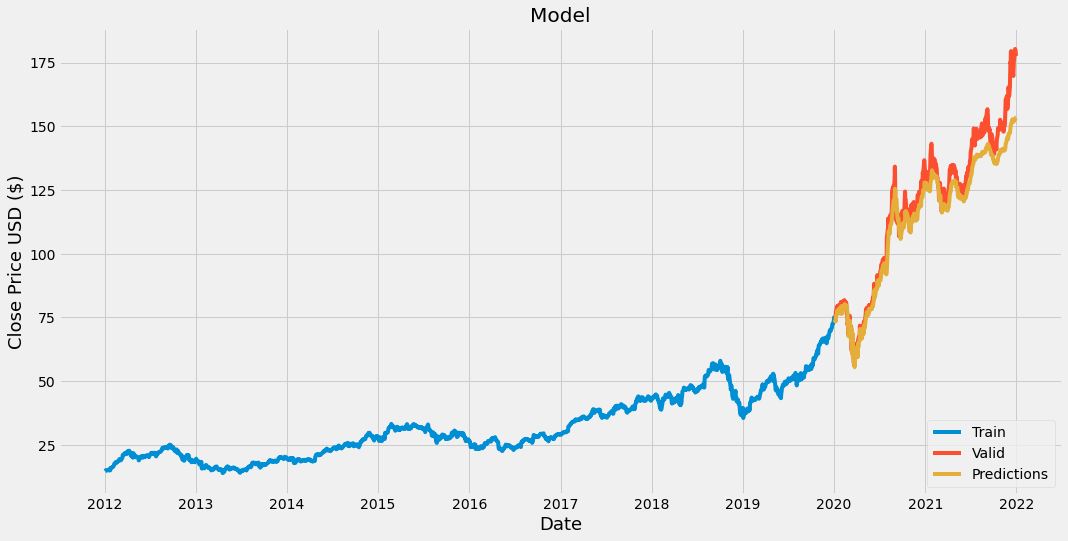

In [24]:
#plot the data
train = df_close[:training_data_len]
valid = df_close[training_data_len:]

valid['Predictions'] = predictions

#visulisation the data
plt.figure(figsize =(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize =18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Valid', 'Predictions'], loc='lower right')
plt.show()

In [25]:
#showing the valid and predicted prices
valid


,Close,Predictions
Date,,
2020-01-06,74.949997,73.052124
2020-01-07,74.597504,73.795517
2020-01-08,75.797501,73.491394
2020-01-09,77.407501,74.603180
2020-01-10,77.582497,75.915497
...,...,...
2021-12-27,180.330002,152.586166
2021-12-28,179.289993,153.259384
2021-12-29,179.380005,153.304291


In [26]:
#predict AAPL closing price
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end= '2022-02-10')

In [27]:
#create a new dataframe
new_df = apple_quote.filter(['Close'])
#get the last 60 days closing price values and convert the DF to an array
last_100 = new_df[-100:].values
#scale the data to be values between 0 and 1
last_100_scaled = scaler.transform(last_100)
#create an empty list
X_test = []
#append the past 100 days 
X_test.append(last_100_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#reshape the data to 3D
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo the sclaing
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[151.89072]]


In [28]:
#predict AAPL closing price
quote2 = web.DataReader('AAPL', data_source='yahoo', start='2022-01-21', end= '2022-02-16')

print (baba_quote2['Close'])


NameError: name 'baba_quote2' is not defined

In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

In [ ]:
# Transform back to original form

#train_predict = scaler.inverse_transform(train_predict)
#test_predict = scaler.inverse_transform(test_predict)
#original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
#original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
# Evaluation metrices RMSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
#print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
#print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
#print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
#print("-------------------------------------------------------------------------------------")
#print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
#print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
#print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

In [ ]:
# Define a function to calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')


In [ ]:
evaluate_prediction(test_predict, y_test, 'LSTM')